In [79]:
#importing all req libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [80]:
#load the dataset
df = pd.read_csv('zomato.csv')

In [81]:
#view the dataset
#pd.set_option("display.max_rows", None, "display.max_columns", None) #command fo viewing entire dataframe
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Column description

url : contains the url of the restaurant in the zomato website
address : contains the address of the restaurant in Bengaluru
name : contains the name of the restaurant
online_order : whether online ordering is available in the restaurant or not
book_table : table book option available or not
rate : contains the overall rating of the restaurant out of 5
votes : contains total number of rating for the restaurant as of the above mentioned date
phone : contains the phone number of the restaurant
location : contains the neighborhood in which the restaurant is located
rest_type : restaurant type
dish_liked : dishes people liked in the restaurant
cuisines : food styles, separated by comma
cost_two : contains the approximate cost for meal for two people
reviews_list : list of tuples containing reviews for the restaurant, each tuple
menu_item : contains list of menus available in the restaurant
service_type : type of meal
serve_to : contains the neighborhood in which the restaurant is listed

# 1. Exploratory Data Analysis.

In [82]:
#viewing column names
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [83]:
#changing few column names
df.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type", "listed_in(city)" : "serve_to"}, inplace = True)
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost_two',
       'reviews_list', 'menu_item', 'service_type', 'serve_to'],
      dtype='object')

In [84]:
#removing few unimp columns
df.drop(['url', 'address', 'phone'], axis=1, inplace = True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'menu_item', 'service_type', 'serve_to'],
      dtype='object')

In [85]:
#chking dtypes nd missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
name            51717 non-null object
online_order    51717 non-null object
book_table      51717 non-null object
rate            43942 non-null object
votes           51717 non-null int64
location        51696 non-null object
rest_type       51490 non-null object
dish_liked      23639 non-null object
cuisines        51672 non-null object
cost_two        51371 non-null object
reviews_list    51717 non-null object
menu_item       51717 non-null object
service_type    51717 non-null object
serve_to        51717 non-null object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


In [86]:
# % of missing values
df.isnull().sum()/len(df)*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.033741
votes            0.000000
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
cost_two         0.669026
reviews_list     0.000000
menu_item        0.000000
service_type     0.000000
serve_to         0.000000
dtype: float64

In [87]:
#we will move column wise to deal with datatype, missing value or any other changes
#rate 
#chking for unique values
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [88]:
#replacing other values with np.nan
df.rate.replace('-',np.nan,inplace=True)
df.rate.replace('NEW',np.nan,inplace=True)

In [89]:
#removing '/5' and changing it to float
df.rate=df.rate.astype(str)
df.rate=df.rate.apply(lambda x: x.replace('/5','')).astype(float)

In [90]:
#cost_two 
#removing , and changing to float type
df.cost_two=df.cost_two.astype('str')
df.cost_two=df.cost_two.apply(lambda x: x.replace(',','')).astype(float)

In [91]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


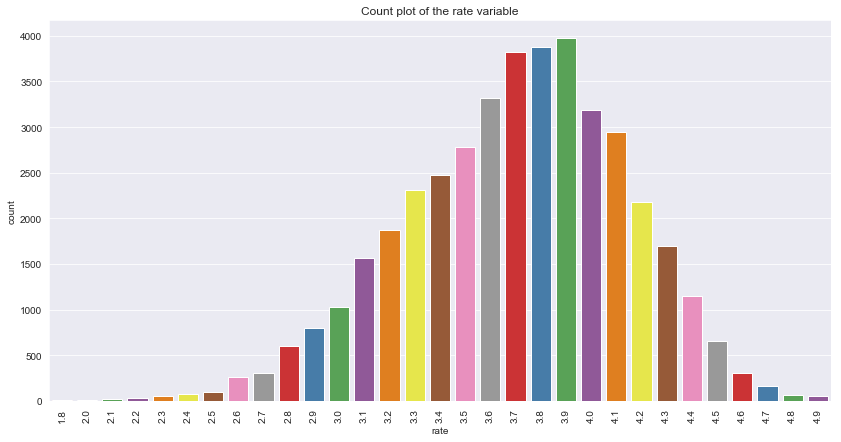

In [92]:
#rate is our target variable
#Checking the count of each rating category present.
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df['rate'], palette='Set1')
plt.title("Count plot of the rate variable")
plt.xticks(rotation = 90)
plt.show()

#From the above rate distribution it nearly follows normal distribution with a mean equal to 3.7. The graph show that the majority of the restaurant rating lies between the 3.4 - 4.2. Very few restaurants have rating 4.8.

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 1008x720 with 0 Axes>

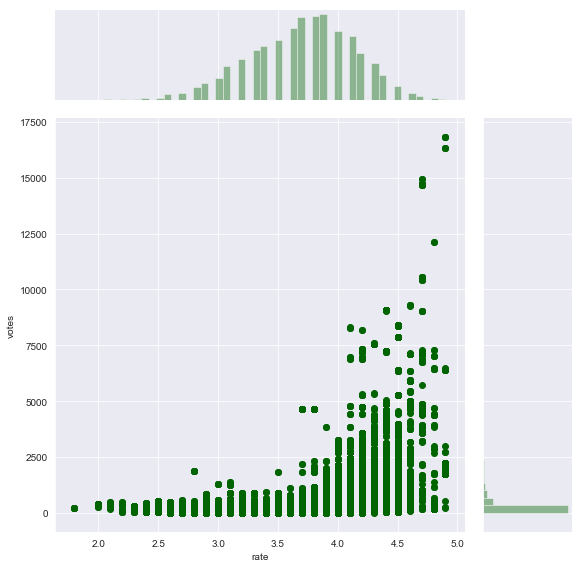

In [93]:
#PLotting a joint plot for rate vs votes
#Joint plot allows us to compare two different variables and see if there is any relationship between these two variables. By using joint plot we can do both univariate and bivariate analysis by plotting the scatter plot (bivariate) and distribution plot (univariate) of two different variables in a single plotting grid
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'votes', data=df, color = 'darkgreen',height = 8, ratio = 4)

#From the scatter plot we can see that the restaurants with higher number of rating has more votes. 

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 1008x720 with 0 Axes>

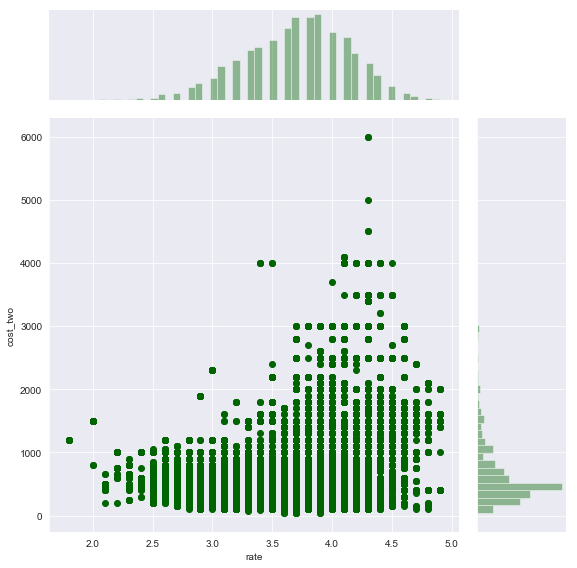

In [94]:
#rate vs cost_two
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'cost_two', data=df, color = 'darkgreen',height = 8, ratio = 4)

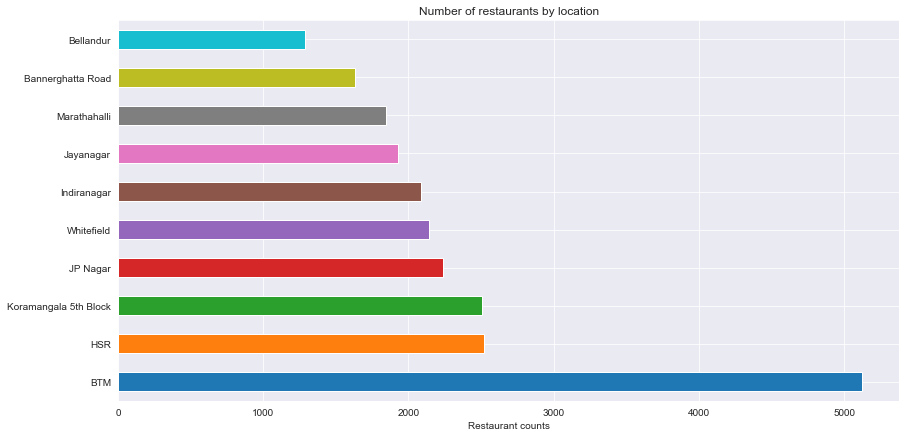

In [95]:
#We will analyze the variable location and see in which area most of the restaurants are located in Bangalore.
df.location.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()

#From the above visualization we can say that most number of the restaurants are located at BTM which makes it most popular residential and commercial and residential places in Banglore.

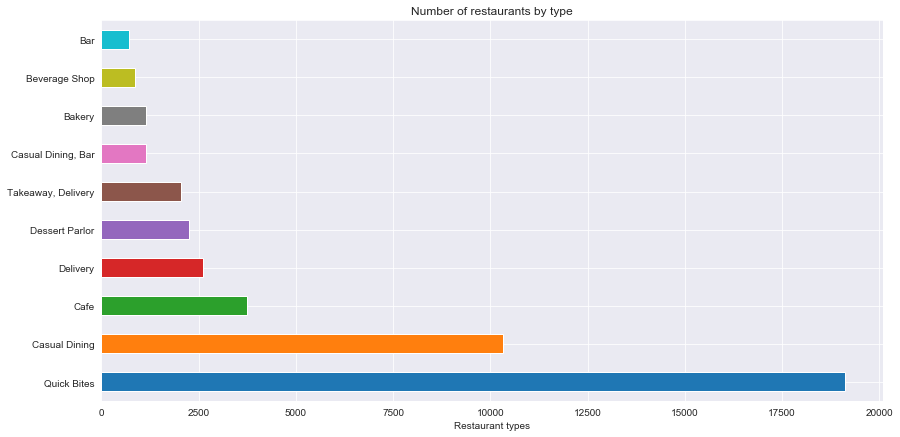

In [96]:
df.rest_type.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by type")
plt.xlabel("Restaurant types")
plt.show()

#From the above visuals shows the top 20 restaurant type. We can see that the restaurant type Quick Bites is more popular among people as compared to the rest of the restaurant types.

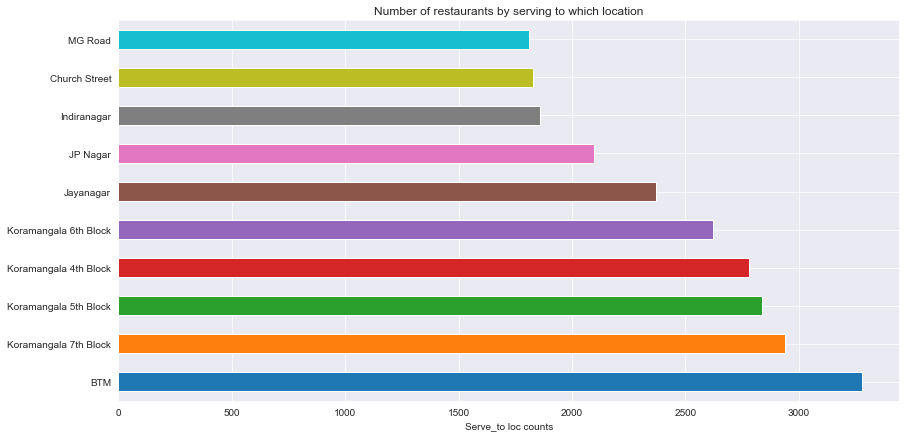

In [97]:
df.serve_to.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by serving to which location")
plt.xlabel("Serve_to loc counts")
plt.show()

#As expected most of the restaurants listed_in deliver to BTM location because this area is home to over more than 3000 restaurants. Even though Koramangaka 7th Block dont have many restaurants still it stands second in terms of the m=number of restaurants that deliver to this location.

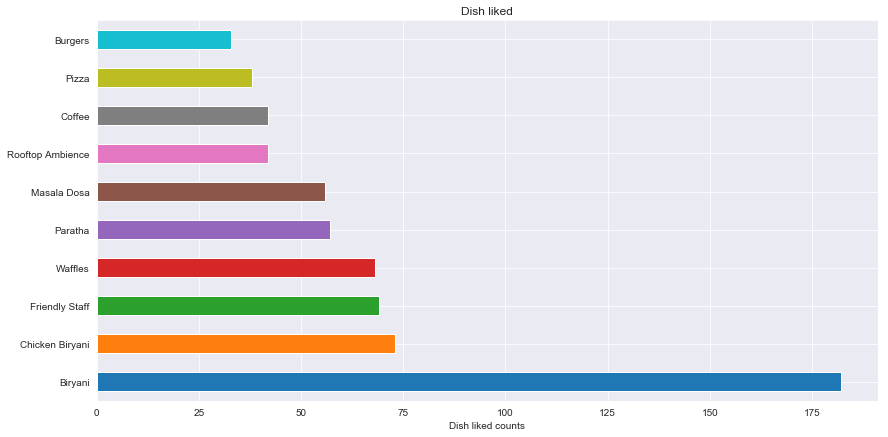

In [98]:
df.dish_liked.value_counts().nlargest(10).plot(kind='barh')
plt.title("Dish liked")
plt.xlabel("Dish liked counts")
plt.show()

#In this graph we can clearly see that the dish Biryani gains the top most position as compared to the rest of the dishes

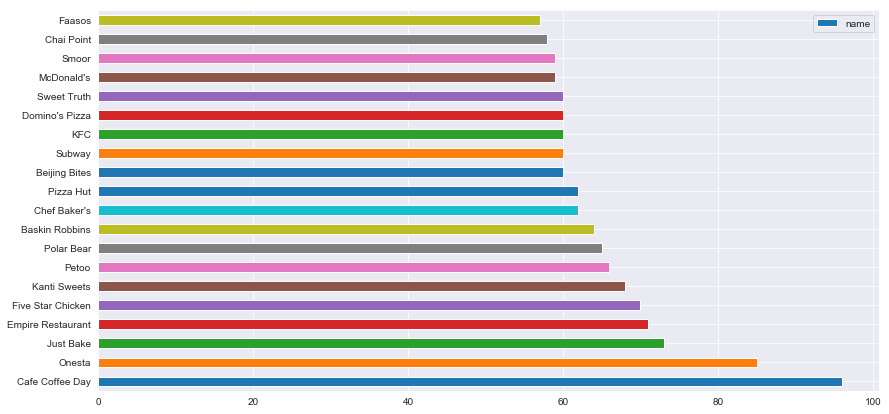

In [99]:
#Checking which are the top 20 restaurants in Bangalore.
df.name.value_counts().nlargest(20).plot(kind = 'barh')
plt.legend()
plt.show()

#The restaurant which is more famous amongst people are Cafe Coffee Day.

In [100]:
#With the help of pie chart we are going to plot how much percentage of online orders are been placed
trace = go.Pie(labels = ['Online_orders', 'No_online_orders'], 
               values = df['online_order'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of order variable')  
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#From the above pie chart we can say people tend to order online rather than going into to a restaurant and dining in.

In [101]:
trace = go.Pie(labels = ['Book_tables', 'No_book_tables'], 
               values = df['book_table'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of tables booked variable')  
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#From the above Pie chart we can see that 87.5% of the restaurants have table booking facility available and 12.5% dont have table booking available.

In [102]:
trace = go.Pie(labels = ['Buffet', 'Cafes','Delivery','Desserts','Dine-out','Drinks & nightlife', 'Pubs and bars'], 
               values = df['service_type'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)
layout = dict(title = 'Type of service')  
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#most common type of service are cbuffet and cafes with rest following

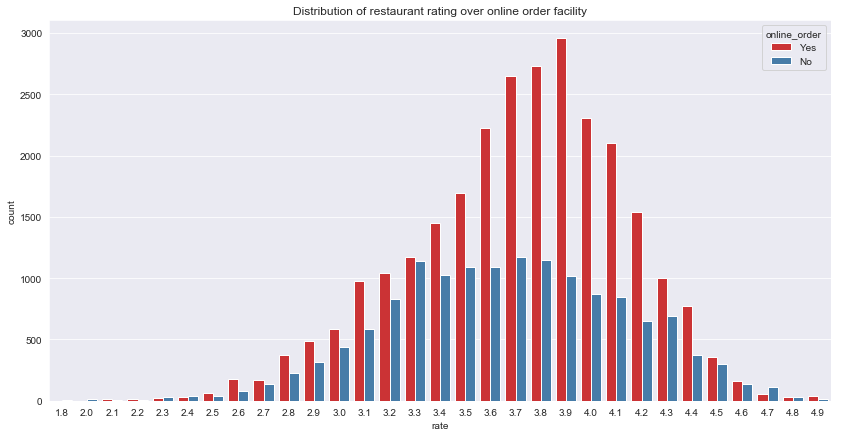

In [103]:
#Checking whether the online order facility impacts the rating of the restaurants
sns.countplot(x = df['rate'], hue = df['online_order'], palette= 'Set1')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

#We can clearly observer If the restaurant which dont have online order facility are more like to lose the rating as compared to the restuarants which have online order facility

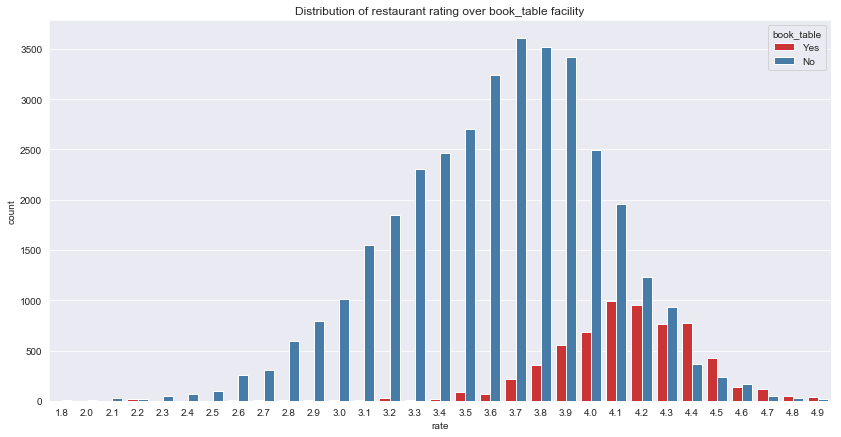

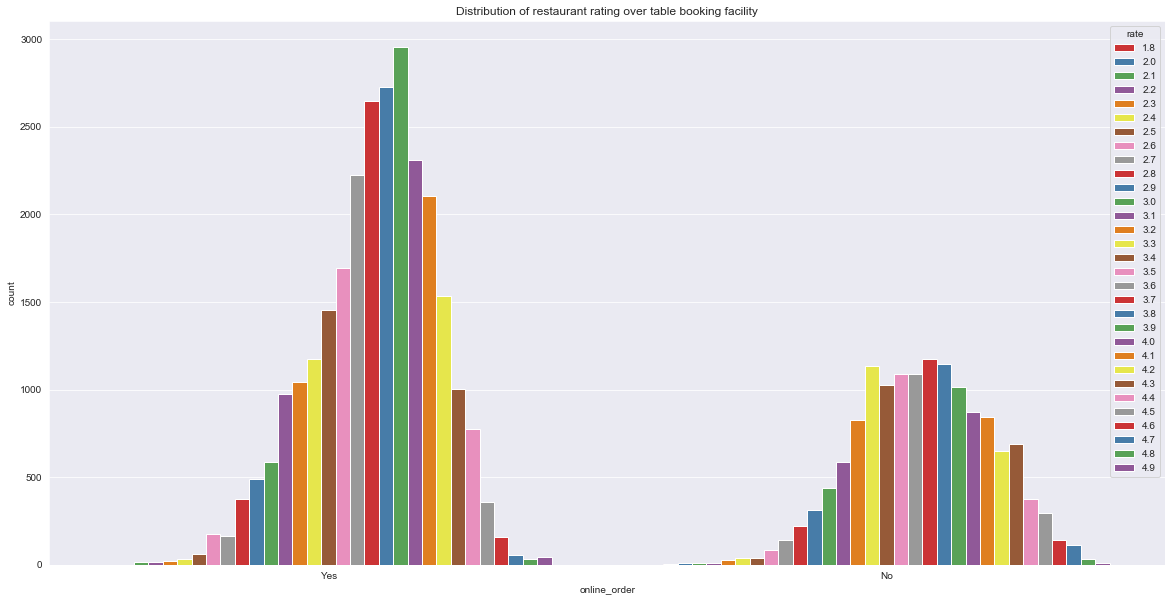

In [104]:
sns.countplot(x = df['rate'], hue = df['book_table'], palette= 'Set1')
plt.title("Distribution of restaurant rating over book_table facility")
plt.show()

#or

plt.figure(figsize=(20,10))
sns.countplot(x = df['online_order'], hue = df['rate'], palette= 'Set1')
plt.title("Distribution of restaurant rating over table booking facility")
plt.show()

#The restaurants which are having table booking facility tends to have higher ratings as compared to the restaurants which dont have table booking facility available with them.

Text(0.5,1,'Biggest Restaurant Chain (Top 5) - Rating more than 4.5')

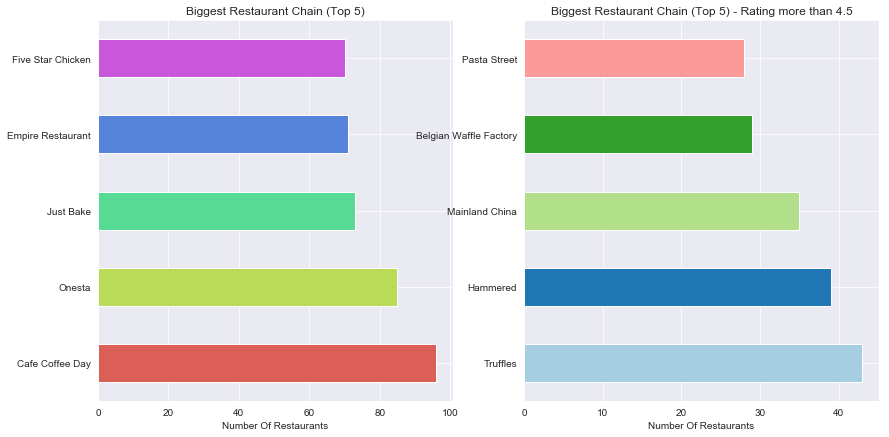

In [105]:
#Comparing Biggest Restaurant Chain and Best Restaurant Chain
#plt.rcParams['figure.figsize'] = 14,7
plt.figure(1)

plt.subplot(121)

df.name.value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(122)

df[df['rate'] >= 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5) - Rating more than 4.5")
#plt.tight_layout()

#Cafe Coffee Day chain has over 90 cafes across the city that are listed in Zomato. 
#On the other hand, Truffles - a burger chain has the best fast food restaurant (rating more than 4.5 out of 100), quality over quantity.

# 2. Feature Engineering.

In [106]:
#dealing with null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_two          346
reviews_list        0
menu_item           0
service_type        0
serve_to            0
dtype: int64

In [107]:
#rate and cost_two are numerical variables; so we will directly replace null values with mean
#rest are categirical variables so we need to deal with them firsts
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['cost_two'] = df['cost_two'].fillna(df['cost_two'].mean())

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



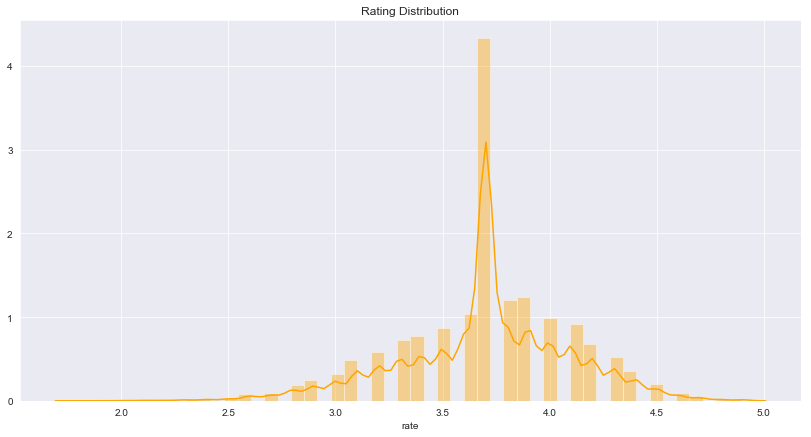

In [108]:
#checking distribution of the numerical variables
# Plotting a distplot
sns.distplot(df['rate'], color = 'orange')
plt.title('Rating Distribution')
plt.show() 

#The rating feature follows a normal distribution

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



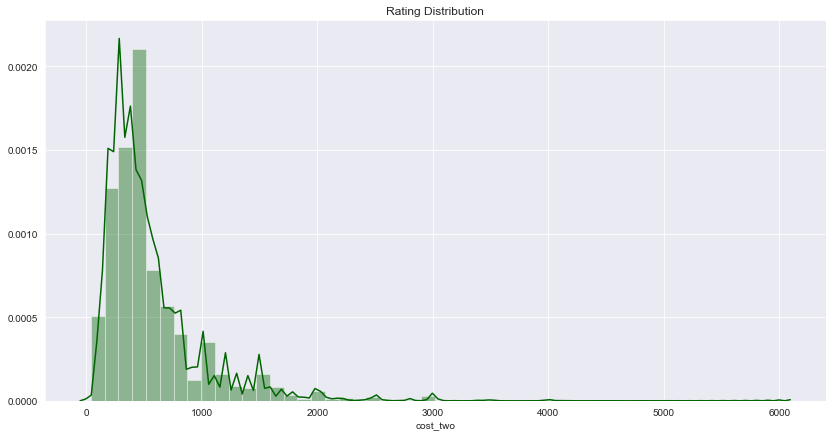

In [109]:
sns.distplot(df['cost_two'], color = 'darkgreen')
plt.title('Rating Distribution')
plt.show()

#The cost two feature also follows nearly normal distribution

In [110]:
#Converting the categorical columns into integer
#We will perform One Hot Encoding operation

#online_order
df['online_order']=pd.get_dummies(df['online_order'],drop_first=True)

#book-table
df['book_table']=pd.get_dummies(df['book_table'],drop_first=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [111]:
#location
loc_dummies=pd.get_dummies(df['location'])
#rest_type
rt_dummies=pd.get_dummies(df['rest_type'])
#serve_type
st_dummies=pd.get_dummies(df['service_type'])

In [112]:
# Concatinating the dataframes
final_df = pd.concat([df,rt_dummies,st_dummies, loc_dummies], axis = 1)
final_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#dropping unwanted columns
final_df = final_df.drop(["name","rest_type","location", 'cuisines', 'dish_liked', 'reviews_list','menu_item','service_type','serve_to'],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#lastly chking for any missing values
final_df.isnull().sum()

online_order                     0
book_table                       0
rate                             0
votes                            0
cost_two                         0
Bakery                           0
Bakery, Beverage Shop            0
Bakery, Cafe                     0
Bakery, Dessert Parlor           0
Bakery, Food Court               0
Bakery, Kiosk                    0
Bakery, Quick Bites              0
Bakery, Sweet Shop               0
Bar                              0
Bar, Cafe                        0
Bar, Casual Dining               0
Bar, Lounge                      0
Bar, Pub                         0
Bar, Quick Bites                 0
Beverage Shop                    0
Beverage Shop, Cafe              0
Beverage Shop, Dessert Parlor    0
Beverage Shop, Quick Bites       0
Bhojanalya                       0
Cafe                             0
Cafe, Bakery                     0
Cafe, Bar                        0
Cafe, Casual Dining              0
Cafe, Dessert Parlor

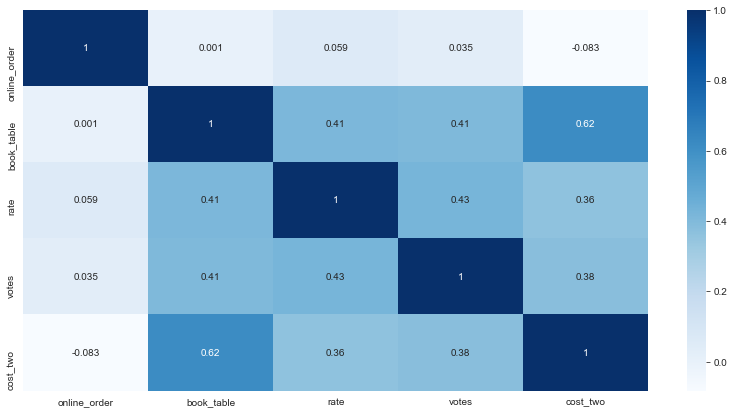

In [115]:
#checking for multicollinearity
sns.heatmap(df.corr(), annot=True, cmap="Blues")

# Feature Selection

In [116]:
# Splitting the features into independent and dependent variables
x = final_df.drop(['rate'], axis = 1)
y= final_df['rate']

# Feature importance
Feature importance gives you a score for each feature of your data, the higher the score the more important or relevant is the feature towards your output variable

Feature importance is an in built class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset

In [117]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [118]:
print(model.feature_importances_)

[2.33740703e-02 1.72176933e-01 3.45765606e-01 1.00031895e-01
 2.07763730e-03 2.63909177e-07 5.34480876e-04 5.73257080e-04
 4.97893596e-05 0.00000000e+00 2.09491202e-03 0.00000000e+00
 2.60456462e-03 5.36066213e-05 1.39282088e-03 4.69492634e-06
 1.14744985e-04 1.77743826e-05 2.03217859e-03 5.14922085e-05
 4.52847187e-04 9.76776413e-04 2.10354462e-07 9.94519062e-03
 9.12256674e-04 6.19893679e-05 1.13925244e-03 1.67790327e-03
 3.25393421e-05 3.49637832e-05 4.05024832e-04 1.30596711e-02
 2.85600602e-03 1.13413958e-03 5.13421988e-08 5.56758748e-05
 5.96052839e-05 1.41134578e-04 9.55244150e-07 1.70409598e-05
 1.56789688e-04 0.00000000e+00 2.00939385e-05 5.52085769e-03
 1.35418940e-02 1.89230853e-04 3.89307265e-04 1.66615439e-03
 3.52169662e-06 8.96679163e-05 9.72730421e-04 1.58952075e-05
 2.37348669e-04 6.06527919e-04 3.63496552e-05 3.07597231e-06
 1.76049289e-06 2.87982055e-03 1.35431250e-06 7.39153045e-05
 3.40338727e-06 6.97784857e-04 1.37681842e-04 3.26723998e-04
 3.49792094e-03 6.837191

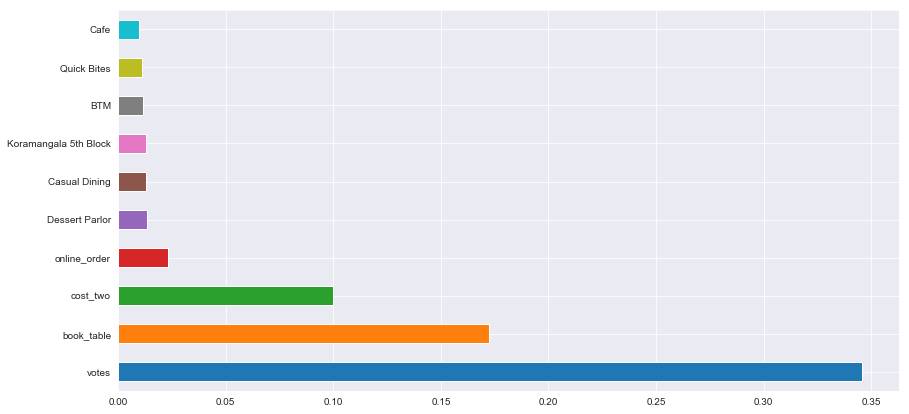

In [119]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#From the above graph we can see the top 10 most important features which are very important to train our model and get correct predictions. We will be using these features for our model building.

# Model Building

In [120]:
#Spliting data into test and train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

# Applying Linear Regression Algorithm

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
r2 = r2_score(y_test,lr_pred)
print('R-Square of train data', (lr.score(x_train,y_train))*100)
print('R-Square of test data: ',r2*100)
print('mse:',mean_squared_error(y_test, lr_pred))

R-Square of train data 33.48016350299488
R-Square of test data:  33.344525453909334
mse: 0.10372827967336827


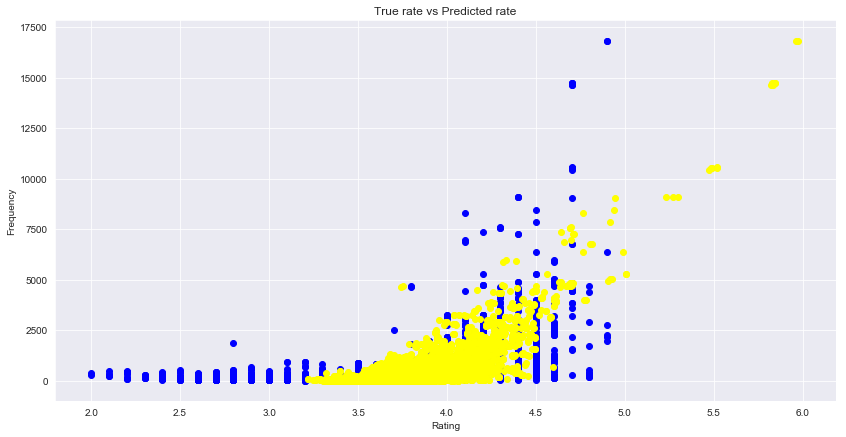

In [122]:
#plotting the Random forest values predicated Rating

plt.scatter(y_test,x_test.iloc[:,2],color="blue") # x axis includes just the vote column
plt.title("True rate vs Predicted rate")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.scatter(lr_pred,x_test.iloc[:,2],color="yellow")

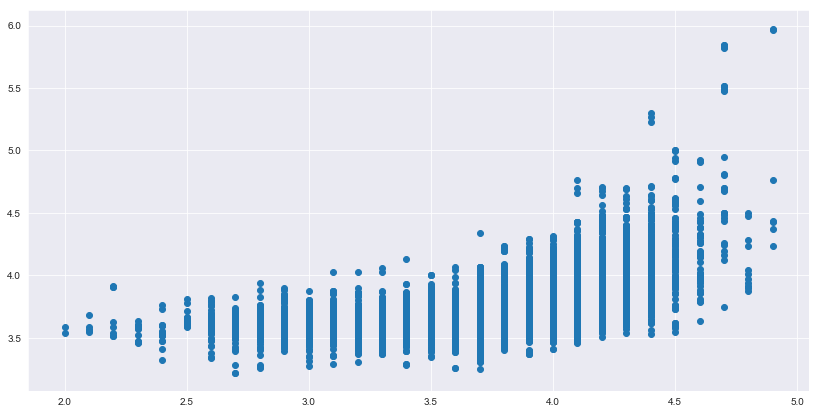

In [123]:
#we see that the residuals are somewhat normally distributed
#sns.distplot(y_test-lr_pred)
#or
plt.scatter(y_test,lr_pred) # not perfevtly linear

# Applying Decision tree Regressor

In [124]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
r2 = r2_score(y_test,dtree_pred)
print('R-Square Score of train set',(dtree.score(x_train,y_train))*100)
print('mse:',mean_squared_error(y_test, dtree_pred))
print('R-Square Score of test set: ',r2*100)

R-Square Score of train set 99.3216060502412
mse: 0.01995373964841829
R-Square Score of test set:  87.17778806876382


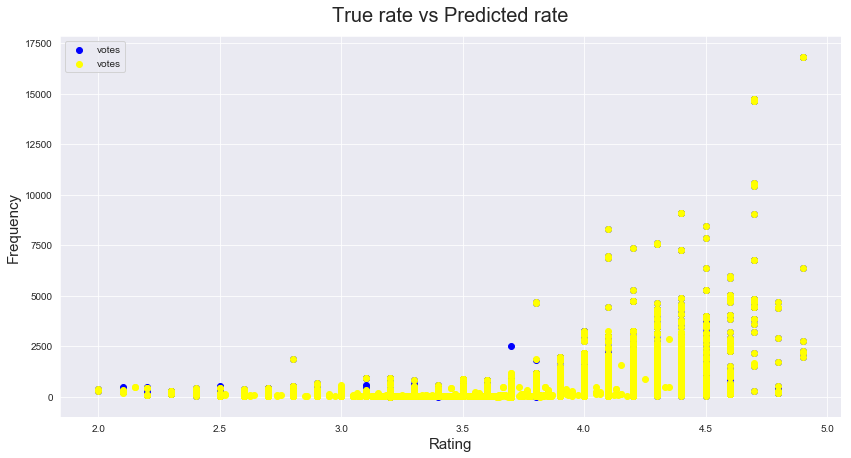

In [125]:
#plotting the Random forest values predicated Rating

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(dtree_pred,x_test.iloc[:,2],color="yellow")
plt.legend()

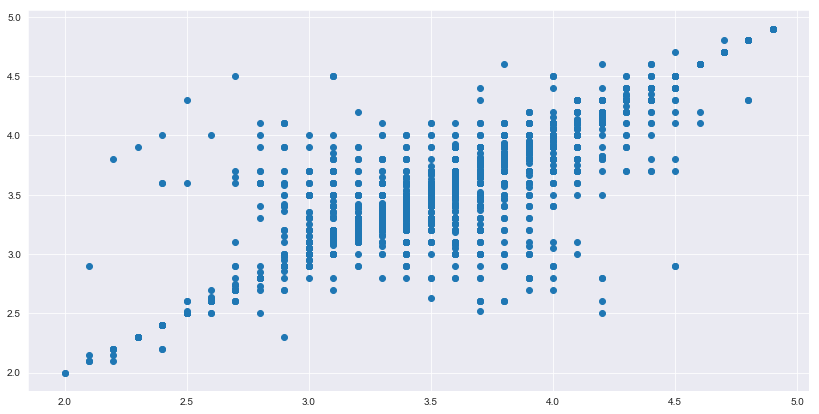

In [126]:
#sns.distplot(y_test-dtree_pred) #almost normally distributed
#or
plt.scatter(y_test,dtree_pred) # better as compared to LR

# Applying Random Forest Regressor Algorithm

In [127]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)
rf_pred = random_forest_regressor.predict(x_test)
r2 = r2_score(y_test,rf_pred)
print('R-Square Score of train set',(random_forest_regressor.score(x_train,y_train))*100)
print('mse:',mean_squared_error(y_test, rf_pred))
print('R-Square Score of test set: ',r2*100)

R-Square Score of train set 97.55387900791715
mse: 0.01714590251517315
R-Square Score of test set:  88.98209560335259


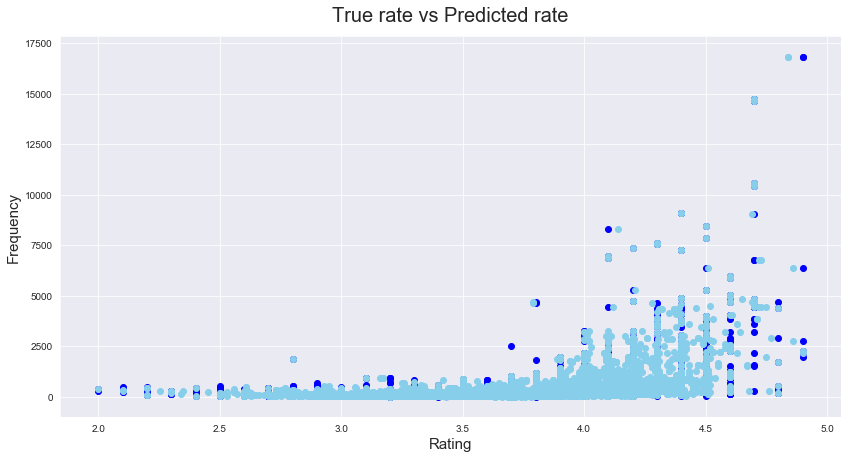

In [128]:
#plotting the Random forest values predicated Rating

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(rf_pred,x_test.iloc[:,2],color="skyblue")

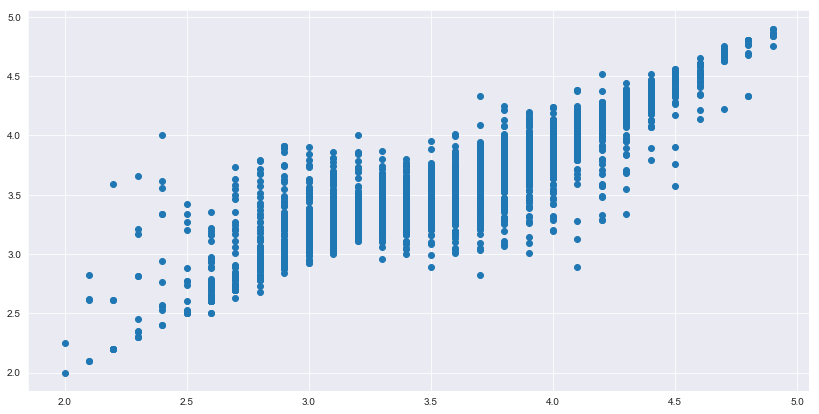

In [129]:
#sns.distplot(y_test-rf_pred) #normally distributed
#or
plt.scatter(y_test,rf_pred) # best linear model obtained so far

# Model Deployment

In [130]:
import pickle

In [131]:
# For Linear Regression
# open a file where you want to store the data
file = open('linear_regression_model.pkl', 'wb')
# dump information to that file
pickle.dump(lr, file)

In [132]:
# For Decision Tree Regressor
# open a file where you want to store the data
file = open('DT_regression_model.pkl', 'wb')
# dump information to that file
pickle.dump(dtree, file)

In [133]:
# For Random Forest Regressor
# open a file where you want to store the data
file = open('RF_regression_model.pkl', 'wb')
# dump information to that file
pickle.dump(random_forest_regressor, file)